##  Pulse Amplitude Modulation (PAM)

### Definition and Principle

Pulse Amplitude Modulation is a pulse modulation technique in which the **amplitude (height) of fixed-width, fixed-period pulses is varied in accordance with the instantaneous amplitude of the analog message signal**.

**Key Characteristic:** The information is encoded in the amplitude of the pulses while width and position remain constant.

## Generation of PAM

**Block Diagram Components:**
1. **Sampler** - Extracts instantaneous values of message signal at regular intervals
2. **Pulse Generator** - Creates fixed-width pulses at sampling rate
3. **Amplitude Modulator** - Varies pulse amplitude based on sampled values
4. **Output Filter** - Shapes the final PAM signal

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pam(message_freq=1, sampling_rate=20, duration=2):
    """Generate PAM signal"""
    t = np.linspace(0, duration, 10000)
    msg = np.sin(2*np.pi*message_freq*t)  # Message signal
    
    # Sampling instants (Nyquist: >=2x msg freq)
    samples_t = np.arange(0, duration, 1/sampling_rate)
    samples = np.sin(2*np.pi*message_freq*samples_t)  # Sample amplitudes
    
    # PAM: pulses at sample times with sample heights
    pam_pulses = np.zeros_like(t)
    pulse_width = 1/(2*sampling_rate)
    for i, st in enumerate(samples_t):
        pulse_mask = (t >= st) & (t < st + pulse_width)
        pam_pulses[pulse_mask] = samples[i]
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1); plt.plot(t, msg); plt.title('Message Signal')
    plt.subplot(3,1,2); plt.stem(samples_t, samples); plt.title('PAM Samples')
    plt.subplot(3,1,3); plt.plot(t, pam_pulses); plt.title('PAM Signal')
    plt.tight_layout(); plt.show()
    
    print(f"PAM BW needed: {sampling_rate} Hz (Nyquist theorem)")


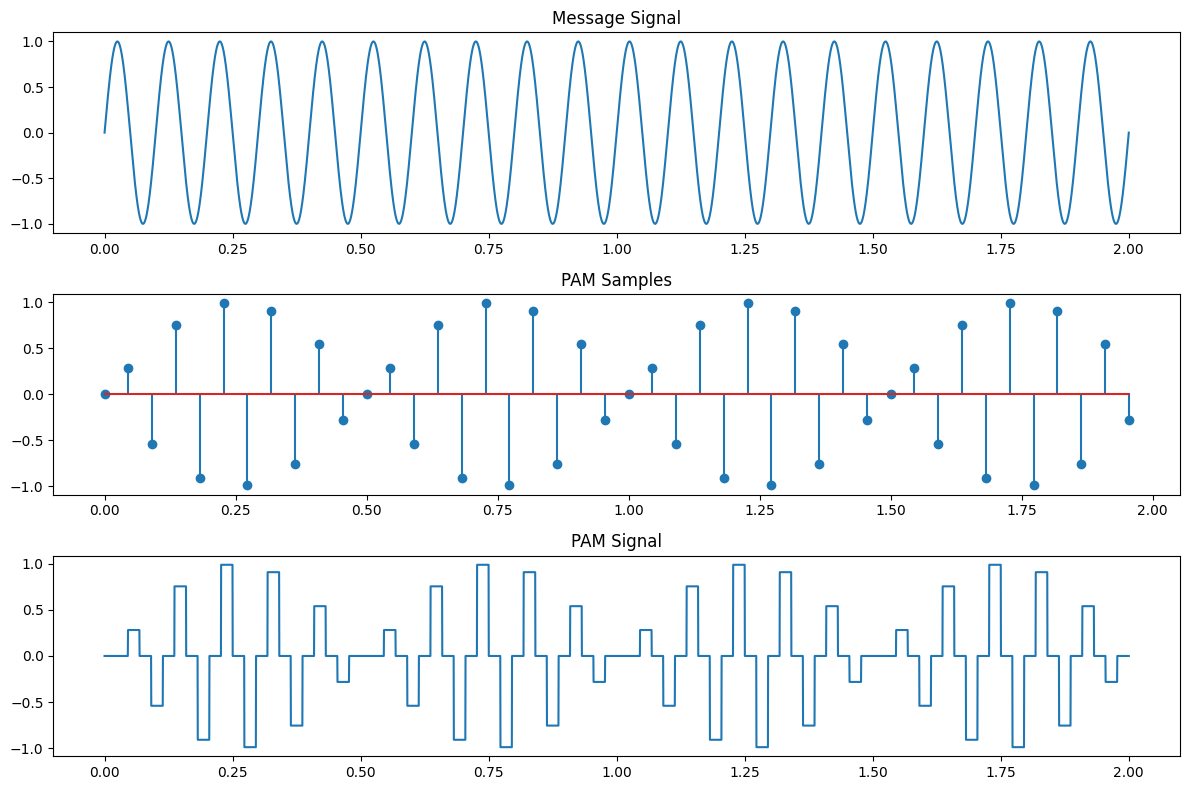

PAM BW needed: 22 Hz (Nyquist theorem)


In [26]:
generate_pam(message_freq=10, sampling_rate=22)

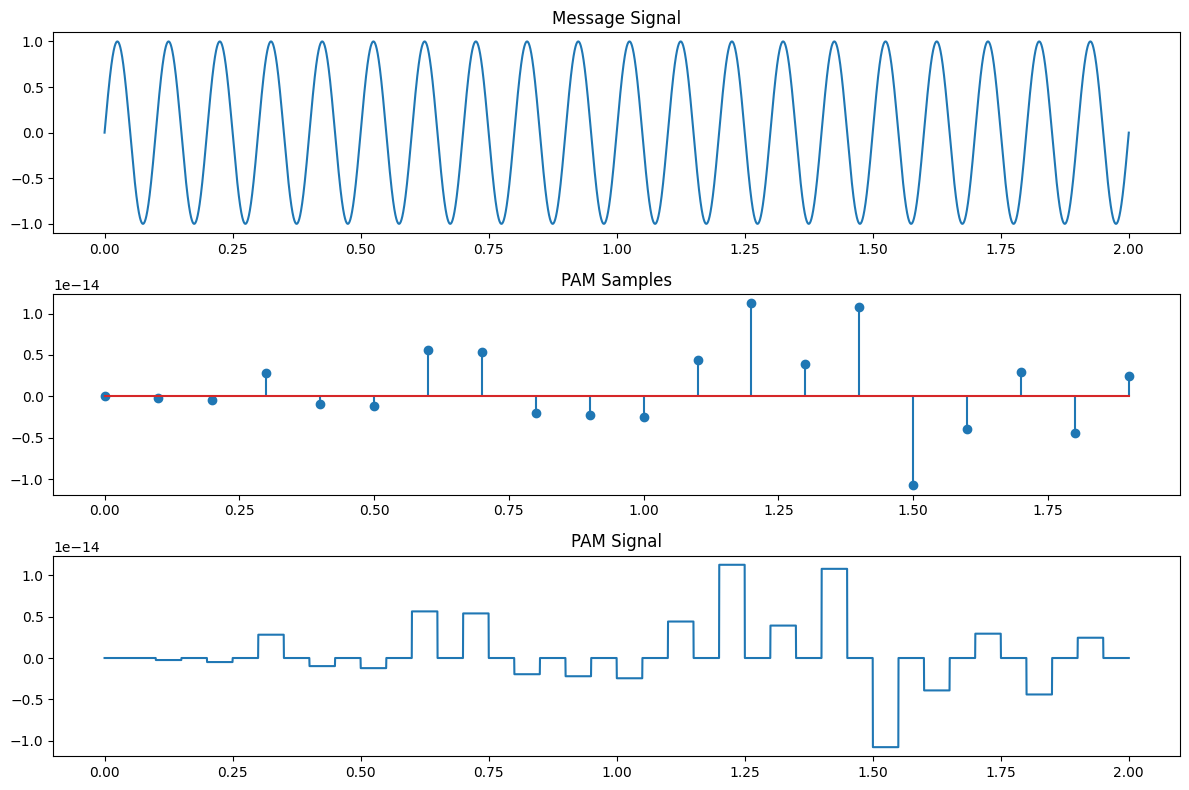

PAM BW needed: 10 Hz (Nyquist theorem)


In [27]:
generate_pam(message_freq=10, sampling_rate=10) # undersampling 

## Demodulation of PAM

PAM demodulation involves:
1. **Pulse Detection** - Recovering the pulse trains from the received signal
2. **Low-Pass Filtering** - Removing high-frequency components to reconstruct the original message signal
3. **Reconstruction** - Using interpolation to recover the continuous analog signal

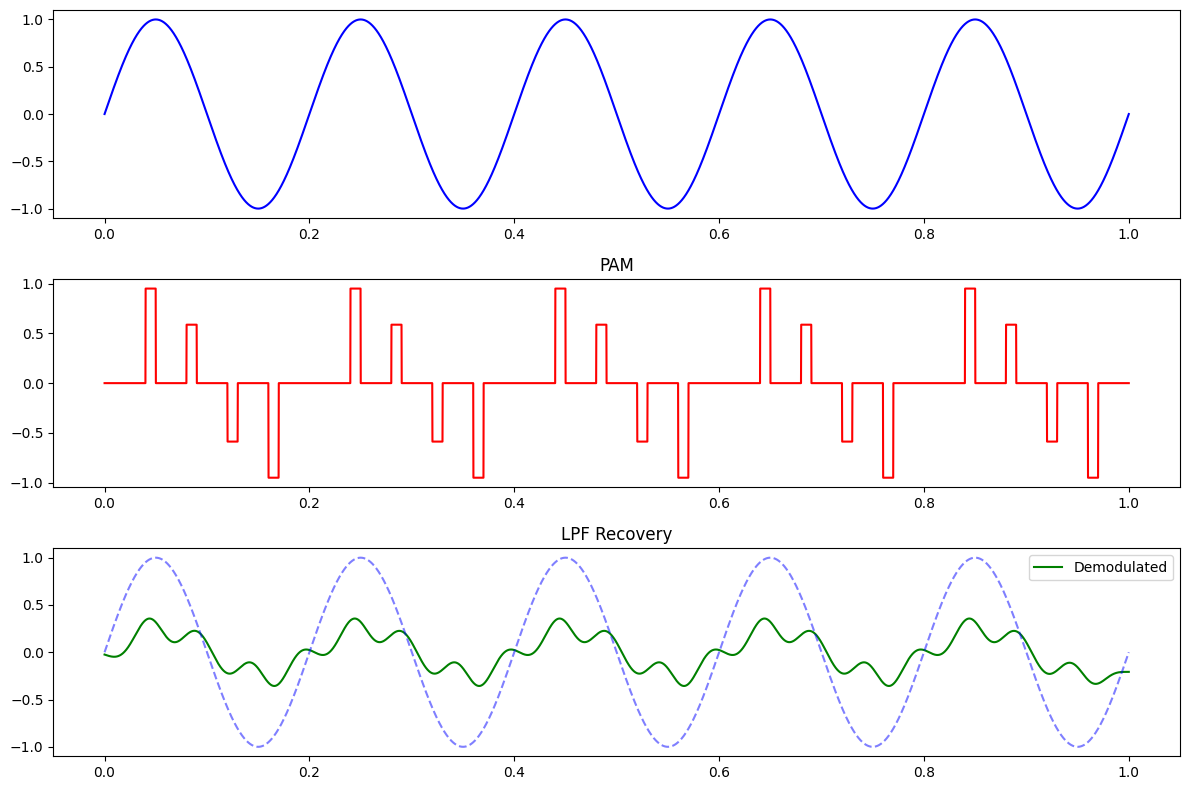

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generate_pam(message_freq=5, sampling_rate=25, duration=1):
    """Fixed PAM generator - now works with demod!"""
    t = np.linspace(0, duration, 10000)
    msg = np.sin(2*np.pi*message_freq*t)
    
    # Sample message at correct rate
    samples_t = np.arange(0, duration, 1/sampling_rate)
    samples = np.interp(samples_t, t, msg)  # Proper sampling
    
    # Create PAM pulses
    pam_signal = np.zeros_like(t)
    pulse_width = 1/(4*sampling_rate)
    for i, st in enumerate(samples_t):
        if st < duration:
            mask = (t >= st) & (t < st + pulse_width)
            pam_signal[mask] = samples[i]
    
    return pam_signal, t, msg

def pam_demodulator(pam_signal, t, msg, message_bw):
    """PAM Demod: Low-pass filter extracts original"""
    # LPF cutoff = message bandwidth
    nyquist = message_bw * 2
    b, a = signal.butter(4, nyquist/(len(t)/2), btype='low')
    demod = signal.filtfilt(b, a, pam_signal)
    
    plt.figure(figsize=(12,8))
    plt.subplot(3,1,1); plt.plot(t, msg, 'b', label='Original')
    plt.subplot(3,1,2); plt.plot(t, pam_signal, 'r'); plt.title('PAM')
    plt.subplot(3,1,3); plt.plot(t, demod, 'g', label='Demodulated')
    plt.plot(t, msg, 'b--', alpha=0.5); plt.legend(); plt.title('LPF Recovery')
    plt.tight_layout(); plt.show()

# Complete working demo
pam_signal, t, msg = generate_pam(message_freq=5, sampling_rate=25)
pam_demodulator(pam_signal, t, msg, message_bw=10)  # 4kHz voice → 10Hz here


### Advantages and Disadvantages

**Advantages:**
- Simple to generate and demodulate
- Bandwidth requirement moderate
- Straightforward pulse amplitude comparison
- Lower circuit complexity

**Disadvantages:**
- Highly susceptible to noise and interference (noise amplitude directly affects information)
- Requires linear amplification (increases power consumption)
- Poor performance in noisy channels
- Requires careful amplifier design to maintain linearity


### Applications

- **Radar Systems** - Early radar signal processing for target detection
- **Sonar Signal Processing** - Underwater acoustic signal modulation
- **Low-frequency Communications** - Secure naval underwater communications
- **Telephony** - Legacy communication systems
- **Sampling Theory** - Foundation for modern PCM and digital communications